In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

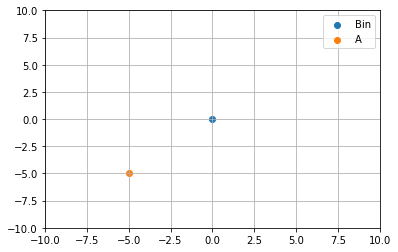

In [2]:
from tkinter import Label


bin_x = 0
bin_y = 0

starting_position_x = -5
starting_position_y = -5

plt.scatter(bin_x, bin_y, label = "Bin")
plt.scatter(starting_position_x, starting_position_y, label = "A")
plt.ylim([-10,10])
plt.xlim([-10,10])
plt.grid()
plt.legend()
plt.show()



In [3]:
import pandas as pd
import numpy as np

In [4]:
def probability(bin_x, bin_y, state_x, state_y, throw_deg):
    probability = 0
    if((state_x == bin_x) & (state_y == bin_y)):
        probability = 1
    else:
        
        # To accomodate for going over the 0 degree line
        if((throw_deg>270) & (state_x<=bin_x) & (state_y<=bin_y)):
            throw_deg = throw_deg - 360
        elif((throw_deg<90) & (state_x>bin_x) & (state_y<bin_y)):
            throw_deg = 360 + throw_deg
        else:
            throw_deg = throw_deg
            
        # Calculate Euclidean distance
        distance = ((bin_x - state_x)**2 + (bin_y - state_y)**2)**0.5

        # max distance for bin will always be on of the 4 corner points:
        corner_x = [-10,-10,10,10]
        corner_y = [-10,10,-10,10]
        dist_table = pd.DataFrame()
        for corner in range(0,4):
            dist = pd.DataFrame({'distance':((bin_x - corner_x[corner])**2 + (bin_y - corner_y[corner])**2)**0.5}, index = [corner])
            dist_table = dist_table.append(dist)
        dist_table = dist_table.reset_index()
        dist_table = dist_table.sort_values('distance', ascending = False)
        max_dist = dist_table['distance'][0]
        
        distance_score = 1 - (distance/max_dist)


        # First if person is directly horizontal or vertical of bin:
        if((state_x==bin_x) & (state_y>bin_y)):
            direction = 180
        elif((state_x==bin_x) & (state_y<bin_y)):
             direction = 0
        
        elif((state_x>bin_x) & (state_y==bin_y)):
             direction = 270
        elif((state_x<bin_x) & (state_y==bin_y)):
             direction = 90
              
        # If person is north-east of bin:
        elif((state_x>bin_x) & (state_y>bin_y)):
            opp = abs(bin_x - state_x)
            adj = abs(bin_y - state_y)
            direction = 180 +  np.degrees(np.arctan(opp/adj))

        # If person is south-east of bin:
        elif((state_x>bin_x) & (state_y<bin_y)):
            opp = abs(bin_y - state_y)
            adj = abs(bin_x - state_x)
            direction = 270 +  np.degrees(np.arctan(opp/adj))

        # If person is south-west of bin:
        elif((state_x<bin_x) & (state_y<bin_y)):
            opp = abs(bin_x - state_x)
            adj = abs(bin_y - state_y)
            direction =  np.degrees(np.arctan(opp/adj))

        # If person is north-west of bin:
        elif((state_x<bin_x) & (state_y>bin_y)):
            opp = abs(bin_y - state_y)
            adj = abs(bin_x - state_x)
            direction = 90 +  np.degrees(np.arctan(opp/adj))

        direction_score = (45-abs(direction - throw_deg))/45
      
        probability = distance_score*direction_score
        if(probability>0):
            probability = probability
        else:
            probability = 0
        
    return(probability)

In [5]:
bin_x = 0
bin_y = 0

starting_position_x = -5
starting_position_y = -5

test_1 = probability(bin_x, bin_y, starting_position_x, starting_position_y, 50)
test_2 = probability(bin_x, bin_y, starting_position_x, starting_position_y, 60)

In [6]:
print("Probability of first throw at 50 degrees = ", np.round(test_1,4))
print("Probability of second throw at 60 degress = ", np.round(test_2,4))

Probability of first throw at 50 degrees =  0.4444
Probability of second throw at 60 degress =  0.3333


In [11]:

probability(bin_x, bin_y, 1, 2, 180)

0.344891721810407

In [16]:
bin_x = 0
bin_y = 0
throw_direction = 180

prob_table = pd.DataFrame()
for i in range(0,20):
    state_x = -10 + i
    for j in range(0,20):
        state_y = -10 + j
        probab = probability(bin_x, bin_y, state_x, state_y, throw_direction)
        prob = pd.DataFrame({'x':state_x,'y':state_y,'prob': probab}, index = [0])
        prob_table = prob_table.append(prob)
prob_table = prob_table.reset_index()


plt.scatter(prob_table['x'], prob_table['y'], s=prob_table['prob']*400, alpha=0.5)
plt.ylim([-10,10])
plt.xlim([-10,10])
plt.grid()
plt.title("Probability of Landing Shot for a given Thrown Direction: \n " + str(throw_direction)+" degrees")
plt.show()

UnboundLocalError: local variable 'probability' referenced before assignment

In [2]:
import numpy as np

In [4]:
thing = np.array([[1, 2, 4, 5]])



In [7]:
adding = np.matrix([1]*10).T
thing = np.arange(100).reshape(10,10)
x = np.hstack((adding, thing))
x


matrix([[ 1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [ 1, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [ 1, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [ 1, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [ 1, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [ 1, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [ 1, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [ 1, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [ 1, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [13]:
for i in x:
    for l in i:
        print(l.item(0))
        break

1
1
1
1
1
1
1
1
1
1
